# Laboration - Skolstatistik

Vi hör mycket i media om att Sveriges PISA-resultat blir sämre och att svenska skolan tappar i kunskapsnivå. Låt oss
undersöka lite närmre hur det ser ut med hjälp av nationella prov i årskurs 9.

#### Data
Skolverket har samlat mycket statistik kring nationella proven i årskurs 9 som vi kommer att analysera vidare.

#### Uppgifter
Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera
matplotlib/seaborngrafer i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att
referera till dem. Notera att du behöver ställa in bakgrundsfärg när du sparar matplotlibgrafer, annars blir de
transparenta och svåra att läsa.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar, clutter ska tas bort, jobba
med attention mha färger mm.


### Uppgift 0 - uppvärmning med riket
I den här uppgiften ska du visualisera med hjälp av matplotlib och/eller seaborn
- a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på respektive dataframe så du får något liknande som nedan.
- b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.
- c) Rita ett stapeldiagram på totala poängen för de olika ämnena.
- d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.

![](chart_1.png)

#### a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på respektive dataframe så du får något liknande som nedan.

In [50]:
import pandas as pd

# Read files and specify sheets names
df_eng = pd.read_excel('riket2023_åk9_np.xlsx', sheet_name='Engelska', skiprows=8)
df_mat = pd.read_excel('riket2023_åk9_np.xlsx', sheet_name='Matematik', skiprows=8)
df_swe = pd.read_excel('riket2023_åk9_np.xlsx', sheet_name='Svenska', skiprows=8)
df_swe_as = pd.read_excel('riket2023_åk9_np.xlsx', sheet_name='Svenska som andraspråk', skiprows=8)

# Rename columns for each DataFrame
column_names = ['Plats', 'Huvudman', 'Totalt(A-F)', 'Flickor(A-F)', 'Pojkar(A-F)',
                'Totalt(A-E)', 'Flickor(A-E)', 'Pojkar(A-E)',
                'Totalt(poäng)', 'Flickor(poäng)', 'Pojkar(poäng)']

df_eng.columns = column_names
df_mat.columns = column_names
df_swe.columns = column_names
df_swe_as.columns = column_names

# Displaying first few rows of each DataFrame to verify changes
print("Engelska:")
print(df_eng.head())
print("\nMatematik:")
print(df_mat.head())
print("\nSvenska:")
print(df_swe.head())
print("\nSvenska som andraspråk:")
print(df_swe_as.head())


Engelska:
   Plats    Huvudman  Totalt(A-F)  Flickor(A-F)  Pojkar(A-F)  Totalt(A-E)  \
0  Riket    Samtliga       106941         51864        55077         97.0   
1  Riket    Kommunal        84310         40675        43635         96.6   
2  Riket     Enskild        22582         11165        11417         98.7   
3  Riket  Skolverket           49            24           25        100.0   

   Flickor(A-E)  Pojkar(A-E)  Totalt(poäng)  Flickor(poäng)  Pojkar(poäng)  
0          97.1         97.0           15.7            15.8           15.7  
1          96.6         96.6           15.4            15.5           15.4  
2          98.8         98.7           16.9            17.0           16.8  
3         100.0        100.0           18.5            18.9           18.2  

Matematik:
   Plats    Huvudman  Totalt(A-F)  Flickor(A-F)  Pojkar(A-F) Totalt(A-E)  \
0  Riket    Samtliga       106766         51548        55218        89.1   
1  Riket    Kommunal        84163         40386        

In [53]:
import pandas as pd

# Read files and specify sheets names
df_eng = pd.read_excel('riket2023_åk9_np.xlsx', sheet_name='Engelska', skiprows=8)
df_mat = pd.read_excel('riket2023_åk9_np.xlsx', sheet_name='Matematik', skiprows=8)
df_swe = pd.read_excel('riket2023_åk9_np.xlsx', sheet_name='Svenska', skiprows=8)
df_swe_as = pd.read_excel('riket2023_åk9_np.xlsx', sheet_name='Svenska som andraspråk', skiprows=8)

# Rename columns for each DataFrame
column_names = ['Plats', 'Huvudman', 'Totalt(A-F)', 'Flickor(A-F)', 'Pojkar(A-F)',
                'Totalt(A-E)', 'Flickor(A-E)', 'Pojkar(A-E)',
                'Totalt(poäng)', 'Flickor(poäng)', 'Pojkar(poäng)']

df_eng.columns = column_names
df_mat.columns = column_names
df_swe.columns = column_names
df_swe_as.columns = column_names


Exporting the excel files, they can be found in the "visualiseringar" folder

In [ ]:
# Export dataframes to separate Excel files, commented to avoid generating extra files
#df_eng.to_excel('engelska_grades.xlsx', index=False)
#df_mat.to_excel('matematik_grades.xlsx', index=False)
#df_swe.to_excel('svenska_grades.xlsx', index=False)
#df_swe_as.to_excel('svenska_som_andraspråk_grades.xlsx', index=False)

#### b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.

In [55]:
# Filter the DataFrame to include only rows where "Huvudman" equals "Samtliga"
df_mat_samtliga = df_mat[df_mat['Huvudman'] == 'Samtliga']

# Extracting relevant columns for Mathematics
total_math_students = df_mat_samtliga['Totalt(A-F)']
girls_math_students = df_mat_samtliga['Flickor(A-F)']
boys_math_students = df_mat_samtliga['Pojkar(A-F)']

# Clean and convert percentage columns to numeric values
percentages_cleaned_total = df_mat_samtliga['Totalt(A-E)'].astype(float)
percentages_cleaned_girls = df_mat_samtliga['Flickor(A-E)'].astype(float)
percentages_cleaned_boys = df_mat_samtliga['Pojkar(A-E)'].astype(float)

# Calculate the number of students who received an 'F' grade in Mathematics
total_f_math = (total_math_students * (100 - percentages_cleaned_total) / 100).round().astype(int)
girls_f_math = (girls_math_students * (100 - percentages_cleaned_girls) / 100).round().astype(int)
boys_f_math = (boys_math_students * (100 - percentages_cleaned_boys) / 100).round().astype(int)

# Print the results
print("Total number of students who received an 'F' grade in Mathematics:", total_f_math.sum())
print("Number of boys who received an 'F' grade in Mathematics:", boys_f_math.sum())
print("Number of girls who received an 'F' grade in Mathematics:", girls_f_math.sum())



Total number of students who received an 'F' grade in Mathematics: 11637
Number of boys who received an 'F' grade in Mathematics: 5798
Number of girls who received an 'F' grade in Mathematics: 5825


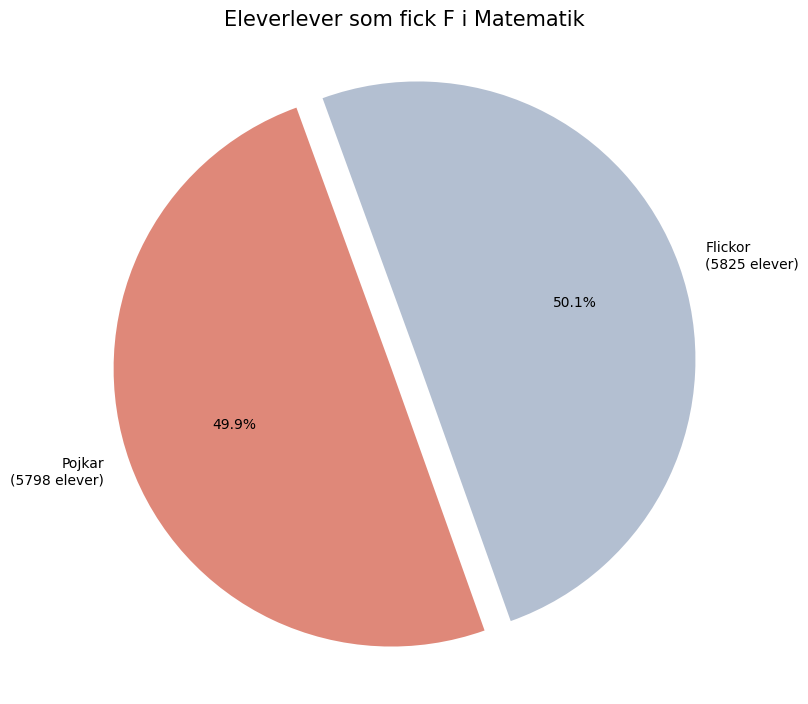

In [85]:
import matplotlib.pyplot as plt

# Total number of students
total_f_math_students = total_f_math.sum()

# By gender
total_f_math_boys = boys_f_math.sum()
total_f_math_girls = girls_f_math.sum()

# Create a pie chart
labels = [f'Pojkar\n({total_f_math_boys} elever)', f'Flickor\n({total_f_math_girls} elever)']
sizes = [total_f_math_boys, total_f_math_girls]
colors = ['#df8879', '#b3bfd1']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=110)
plt.title('Eleverlever som fick F i Matematik', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.subplots_adjust(left=0.1, right=0.9, top=1.2, bottom=0.1)

# Saving png file with background

#plt.savefig('pie_chart_with_light_grey_background.png', bbox_inches='tight', transparent=True, pad_inches=0, facecolor=(1, 1, 1))
plt.show()



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the Excel file
file_path = 'riket2023_åk9_np.xlsx'

# Read the data for "Engelska" sheet and clean up column names
df_eng = pd.read_excel(file_path, sheet_name='Engelska', skiprows=1)
df_eng.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)',
                  'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)',
                  'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)']

# Convert 'Totalt (A-F)' column to numeric
df_eng['Totalt (A-F)'] = pd.to_numeric(df_eng['Totalt (A-F)'], errors='coerce')

# Visualize the data using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Huvudman', y='Totalt (A-F)', data=df_eng)
plt.title('Engelska - Totalt (A-F) by Huvudman')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


